# sbiz 와 nice biz info  데이터 결합
- sbiz 및 nice biz info 주소와 업종 칼럼 정제하기
- .xlsx에 각각 결합하기
- 사업자번호기준, nice biz info 결합하기
- 행정구역 및 대분류업종 기준으로 sbiz결합하기

20221121 수정


 ## 소상공인시장진흥공단 Sbiz - 지역별 경영현황 데이터 불러오기
 
- https://sg.sbiz.or.kr/godo/index.sg
- https://sg.sbiz.or.kr/godo/stat/updens.sg

- **주간인구수**: 시군구 단위의 주간인구통계 (단위:천명) /\
  **밀집도**: 인구 천명당 사업체수 /\
  **밀집도_중위값**: 세세분류 단위에서 밀집도 중위값 /\
  **밀집정도**: 밀집도 - 밀집도_중위값 (0 이상인 경우 " 고"로, 미안인 경우 " 저"로 구분) -->재무데이터와 결합시, 업종별 중위값의 평균값으로 고.저 구분 필요할 것으로 보임/\
  **동종근로자_임금_수준미만**: 연간 영업이익 대비 동종입금근로자 임금 수준미만인 업종 비중 /\
  **동종근로자_임금_수준미만_척도**: 4점 척도로 연간 영업이익 대비 등종업종근로자 임금 수준이 미만인 사업체 비중을 세세분류 수준에서, \
  사업체 중 차지하는 비중이 75 % 이상 " 매우 높음"\
  사업체 중 차지하는 비중이 50 ~ 7496 " 높음"\
  사업체 중 차지하는 비중이 25 ~ 4996 " 보통"\
  사업체 중 차지하는 비중이 25 % 이하 " 낮음"으로 평가


In [95]:
#sbiz 크롤링 데이터 불러오기
import pandas as pd

df_sbiz=pd.read_csv(r'C:\Users\Choi\workspace\sesac\0놋북2자료_1028\공모전\data\1차정제\팀원 공통자료\sbiz\sbiz_crawling_preprocessed.csv',encoding = 'utf-8')
df_sbiz.head()

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,서울특별시 > 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저
1,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고
2,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저
3,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저
4,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저


### 행정구역, 업종 칼럼 전처리
- '>' 및 괄호안 숫자 제거, 공백기준 업종 분리 

In [96]:
# 행정구역 '>' 제거
df_sbiz['행정구역']=df_sbiz['행정구역'].str.replace('>', ' ')



In [97]:
address_split=df_sbiz['행정구역'].str.split('  ')
address_split[0]
address_split.str.get(1)

0         종로구
1         종로구
2         종로구
3         종로구
4         종로구
         ... 
70050     양양군
70051     양양군
70052     양양군
70053     양양군
70054     양양군
Name: 행정구역, Length: 70055, dtype: object

In [98]:
df_sbiz["시도"] = address_split.str.get(0)
df_sbiz["군구"] = address_split.str.get(1)
df_sbiz['군구']=df_sbiz["군구"].str.strip() 

In [99]:
#df_sbiz['업종'][0]
#업종 칼럼 '>' 기준 분리

ind_split=df_sbiz['업종'].str.split('>')
ind_split

0        [제조업(10~34) ,  동물성 및 식물성 유지 제조업 ,  동물성 및 식물성 유...
1         [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  떡류 제조업]
2         [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  빵류 제조업]
3        [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  천연 및 ...
4         [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  커피 가공업]
                               ...                        
70050    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70051    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70052    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70053    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70054    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
Name: 업종, Length: 70055, dtype: object

In [100]:
# 기존 df_sbiz 데이터프레임에 삽입
df_sbiz["대분류"] = ind_split.str.get(0)
df_sbiz["중분류"] = ind_split.str.get(1)
#중복인듯?
#df_sbiz["중분류2"] = ind_split.str.get(2)
df_sbiz["소분류"] = ind_split.str.get(3)
df_sbiz["행정구역2"]=df_sbiz["시도"]+' '+df_sbiz["군구"]
df_sbiz.head()

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,시도,군구,대분류,중분류,소분류,행정구역2
0,서울특별시 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저,서울특별시,종로구,제조업(10~34),동물성 및 식물성 유지 제조업,식물성 유지 제조업,서울특별시 종로구
1,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고,서울특별시,종로구,제조업(10~34),기타 식품 제조업,떡류 제조업,서울특별시 종로구
2,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저,서울특별시,종로구,제조업(10~34),기타 식품 제조업,빵류 제조업,서울특별시 종로구
3,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저,서울특별시,종로구,제조업(10~34),기타 식품 제조업,천연 및 혼합 조제 조미료 제조업,서울특별시 종로구
4,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저,서울특별시,종로구,제조업(10~34),기타 식품 제조업,커피 가공업,서울특별시 종로구


In [101]:
# 공백제거
df_sbiz['대분류2']=df_sbiz["대분류"].str.replace(r"\(.*\)","")
df_sbiz['대분류2']=df_sbiz["대분류2"].str.strip() #칼럼별로 적용할 경우str붙이기 , 안붙이면 리슽으에서만 가능
df_sbiz['중분류']=df_sbiz["중분류"].str.strip()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


- sbiz대분류가 10차 산업분류의 업종대분류와 일치
- 모델링을 위해 대분류 기준으로 merge 할예정

In [102]:
pd.DataFrame(df_sbiz['대분류2'].value_counts())

,대분류2
도매 및 소매업,23469
제조업,14433
건설업,6757
"협회 및 단체, 수리 및 기타 개인 서비스업",5268
"예술, 스포츠 및 여가관련 서비스업",4688
숙박 및 음식점업,3308
"사업시설 관리, 사업 지원 및 임대 서비스업",3162
교육 서비스업,1976
부동산업,1737
운수 및 창고업,1686


- 중분류는 10차 산업분류의 중분류와 불일치하며
- 중분류는 10차 산업분류의 소분류와 일치하는 것으로 보임
- 5자리 산업코드는 통계청의 산업분류코드`

In [103]:
pd.DataFrame(df_sbiz['중분류'].value_counts())

,중분류
생활용품 도매업,4625
음ㆍ식료품 및 담배 도매업,2803
음식점업,2320
유원지 및 기타 오락관련 서비스업,2033
그 외 기타 개인 서비스업,1942
...,...
악기 제조업,3
"증기, 냉ㆍ온수 및 공기 조절 공급업",3
마그네틱 및 광학 매체 제조업,1
내륙 수상 및 항만 내 운송업,1


-  '동종근로자_임금_수준미만_척도' 범주형 데이터 처리

In [104]:
df_sbiz['동종근로자_임금_수준미만_척도'][df_sbiz['동종근로자_임금_수준미만_척도'] == '고'] = 1
df_sbiz['동종근로자_임금_수준미만_척도'][df_sbiz['동종근로자_임금_수준미만_척도'] == '저'] = 0
df_sbiz['동종근로자_임금_수준미만_척도'] = df_sbiz['동종근로자_임금_수준미만_척도'].astype('float')
df_sbiz

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,시도,군구,대분류,중분류,소분류,행정구역2,대분류2
0,서울특별시 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,0.0,서울특별시,종로구,제조업(10~34),동물성 및 식물성 유지 제조업,식물성 유지 제조업,서울특별시 종로구,제조업
1,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,1.0,서울특별시,종로구,제조업(10~34),기타 식품 제조업,떡류 제조업,서울특별시 종로구,제조업
2,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,0.0,서울특별시,종로구,제조업(10~34),기타 식품 제조업,빵류 제조업,서울특별시 종로구,제조업
3,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,0.0,서울특별시,종로구,제조업(10~34),기타 식품 제조업,천연 및 혼합 조제 조미료 제조업,서울특별시 종로구,제조업
4,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,0.0,서울특별시,종로구,제조업(10~34),기타 식품 제조업,커피 가공업,서울특별시 종로구,제조업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70050,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.87,0.04,0.83,78.26,1.0,강원도,양양군,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,노래 연습장 운영업,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업"
70051,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.19,0.04,0.15,60.00,1.0,강원도,양양군,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,기타 오락장 운영업,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업"
70052,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,1.06,0.04,1.01,100.00,1.0,강원도,양양군,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,기타 수상오락 서비스업,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업"
70053,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.15,0.04,0.11,100.00,1.0,강원도,양양군,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,복권 발행 및 판매업,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업"


## NICE Biz info - 기업별 연봉현황 및 산업현황 데이터  불러오기

- https://www.nicebizinfo.com/cm/CM0100M001GE.nice
- **address**: 주소 / **industry**: 산업 / **ind_rank**: 산업평가종합등급 / **payroll**: 평균연봉 / **new_payroll**: 올해입사자 평균연봉 /**employee**: 종업원수 / **employment**: 입사율(연간입사자) / **resignation**: 퇴사율(연간퇴사자) / **cmp_years**: 업력

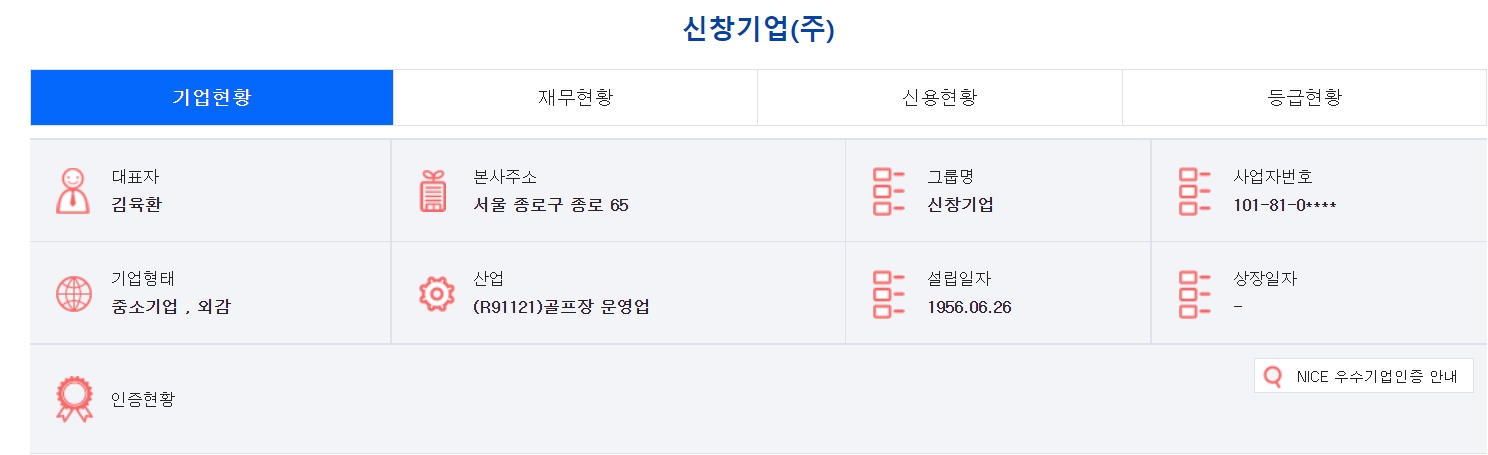


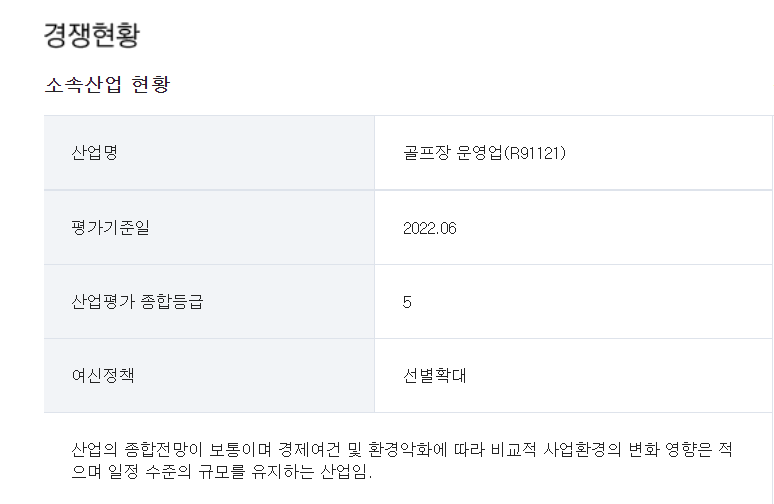

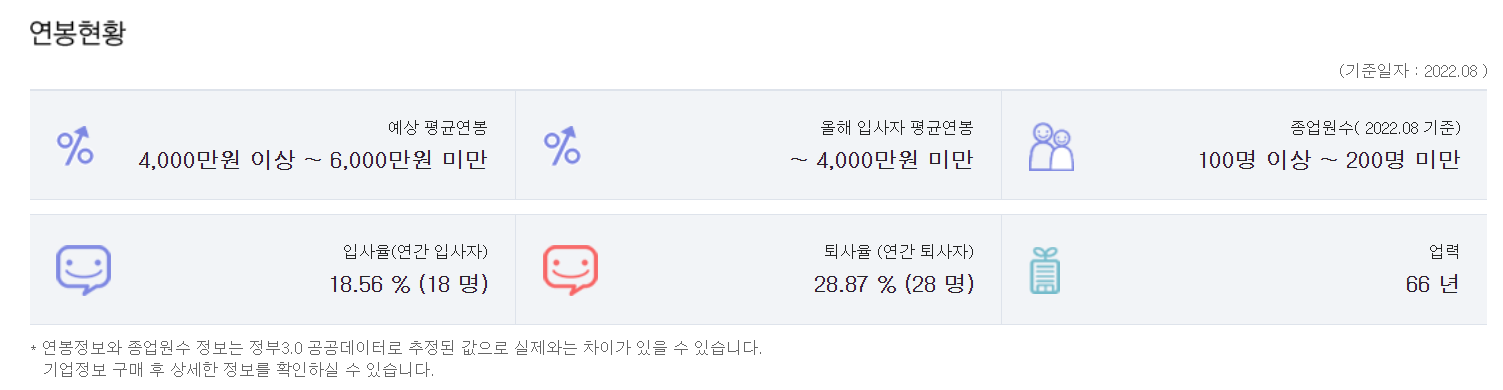

In [12]:
nice_biz=pd.read_excel(r'C:\Users\Choi\workspace\sesac\0놋북2자료_1028\공모전\data\1차정제\팀원 공통자료\biz_info최종\bizinfo_df_prep.xlsx')
nice_biz.head()

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,NaN,0.000,0.00,53.0
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.800,0.60,55.0
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.125,0.25,NaN
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,NaN,0.000,0.00,NaN


### address 칼럼 전처리
- sbiz와의 결합을 위해 시도+군구 까지의 칼럼 만들기

In [13]:

#address칼럼 ' ' 공백기준 분리

address_split=nice_biz['address'].str.split(' ')
address_split[10000]

['충남', '당진시', '신평면', '관곡길', '2']

In [14]:
# 시도 전처리
nice_biz["시도"] = address_split.str.get(0)
nice_biz=nice_biz.replace({'시도' : {'서울' : '서울시'}})
nice_biz=nice_biz.replace({'시도' : {'경남' : '경상남도'}})
nice_biz=nice_biz.replace({'시도' : {'충남' : '충청남도'}})
nice_biz=nice_biz.replace({'시도' : {'경북' : '경상북도'}})
nice_biz=nice_biz.replace({'시도' : {'충북' : '충청북도'}})
nice_biz=nice_biz.replace({'시도' : {'강원' : '강원도'}})
nice_biz=nice_biz.replace({'시도' : {'충북' : '충청북도'}})
nice_biz=nice_biz.replace({'시도' : {'경기' : '경기도'}})
nice_biz=nice_biz.replace({'시도' : {'서울시' : '서울특별시'}})
nice_biz=nice_biz.replace({'시도' : {'부산' : '부산광역시'}})
nice_biz=nice_biz.replace({'시도' : {'울산' : '울산광역시'}})
nice_biz=nice_biz.replace({'시도' : {'인천' : '인천광역시'}})
nice_biz=nice_biz.replace({'시도' : {'전북' : '전라북도'}})
nice_biz=nice_biz.replace({'시도' : {'전남' : '전라남도'}})
nice_biz=nice_biz.replace({'시도' : {'세종특별시' : '세종특별자치시'}})
nice_biz=nice_biz.replace({'시도' : {'세종' : '세종특별자치시'}})
nice_biz=nice_biz.replace({'시도' : {'제주' : '제주특별자치도'}})
nice_biz=nice_biz.replace({'시도' : {'대전' : '대전광역시'}})
nice_biz=nice_biz.replace({'시도' : {'대구' : '대구광역시'}})
nice_biz=nice_biz.replace({'시도' : {'광주' : '광주광역시'}})
nice_biz['시도'].unique()

array(['서울특별시', '경기도', '충청북도', '인천광역시', '대구광역시', '부산광역시', nan, '전라북도',
       '강원도', '경상북도', '대전광역시', '전라남도', '경상남도', '제주특별자치도', '충청남도', '광주광역시',
       '울산광역시', '세종특별자치시', '아산군'], dtype=object)

In [15]:
nice_biz[nice_biz['시도']=='아산군']


,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,시도
20296,3128100483,아산군 선장면 신성리산 113-8,(R91121)골프장 운영업,5.0,1.0,1.0,2.0,0.1538,0.2051,50.0,아산군


In [16]:
nice_biz=nice_biz.replace({'시도' : {'아산군' : '충청남도'}})
nice_biz['시도'].unique()

array(['서울특별시', '경기도', '충청북도', '인천광역시', '대구광역시', '부산광역시', nan, '전라북도',
       '강원도', '경상북도', '대전광역시', '전라남도', '경상남도', '제주특별자치도', '충청남도', '광주광역시',
       '울산광역시', '세종특별자치시'], dtype=object)

- nice biz 크롤링시, 주소값이 검색되지 않은 기업 1380개

In [17]:
print(len(nice_biz[nice_biz['시도'].isnull()]))
print(len(nice_biz[nice_biz['address'].isnull()]))

1380
1380


In [18]:
# 군구 전처리
nice_biz["군구"] = address_split.str.get(1)
nice_biz["군구"].unique()

array(['종로구', '중구', '구로구', '의왕시', '강남구', '서대문구', '의정부시', '음성군', '성남시',
       '금천구', '파주시', '서초구', '성동구', '연수구', '영등포구', '김포시', '안양시', '고양시',
       '마포구', '강서구', '용산구', '부평구', '평택시', '동대문구', '하남시', '동구', '광진구',
       '송파구', '서구', '수원시', '제천시', nan, '용인시', '달서구', '전주시', '성북구', '강릉시',
       '양천구', '화성시', '포항시', '강동구', '과천시', '영광군', '동작구', '목포시', '상주시',
       '익산시', '김제시', '구미시', '군포시', '광주시', '춘천시', '여수시', '인제군', '여주시',
       '시흥시', '안동시', '오산시', '창녕군', '영암군', '제주시', '정읍시', '중랑구', '당진시',
       '경주시', '양주시', '안산시', '청주시', '포천시', '달성군', '남양주시', '광양시', '창원시',
       '계양구', '미추홀구', '진천군', '의령군', '아산시', '완주군', '부천시', '충주시', '거제시',
       '북구', '영덕군', '김해시', '남구', '서천군', '수성구', '수영구', '양산시', '유성구', '논산시',
       '은평구', '안성시', '남동구', '울주군', '가평군', '사상구', '문경시', '보령시', '관악구',
       '예산군', '천안시', '이천시', '노원구', '군산시', '칠곡군', '함안군', '진주시', '순천시',
       '광명시', '영천시', '영주시', '산청군', '해운대구', '사천시', '도봉구', '금정구', '광산구',
       '나주시', '소정면', '연제구', '기장군', '강북구', '강화군', '순창군', '부산진구', '서산시',
     

In [19]:
nice_biz['시도군구']=nice_biz['시도']+' '+nice_biz['군구']


In [20]:
nice_biz["면"] = address_split.str.get(2)
nice_biz["면2"] = address_split.str.get(3)

In [21]:
nice_biz.to_excel('nicebiz_sido.xlsx')

In [22]:
nice_biz['시도군구'].unique()

array(['서울특별시 종로구', '서울특별시 중구', '서울특별시 구로구', '경기도 의왕시', '서울특별시 강남구',
       '서울특별시 서대문구', '경기도 의정부시', '충청북도 음성군', '경기도 성남시', '서울특별시 금천구',
       '경기도 파주시', '서울특별시 서초구', '서울특별시 성동구', '인천광역시 연수구', '서울특별시 영등포구',
       '경기도 김포시', '경기도 안양시', '경기도 고양시', '서울특별시 마포구', '서울특별시 강서구',
       '서울특별시 용산구', '인천광역시 부평구', '경기도 평택시', '서울특별시 동대문구', '경기도 하남시',
       '인천광역시 중구', '대구광역시 동구', '서울특별시 광진구', '서울특별시 송파구', '인천광역시 서구',
       '부산광역시 동구', '경기도 수원시', '충청북도 제천시', nan, '경기도 용인시', '대구광역시 달서구',
       '전라북도 전주시', '서울특별시 성북구', '강원도 강릉시', '서울특별시 양천구', '경기도 화성시',
       '경상북도 포항시', '대전광역시 서구', '서울특별시 강동구', '경기도 과천시', '전라남도 영광군',
       '서울특별시 동작구', '전라남도 목포시', '경상북도 상주시', '전라북도 익산시', '전라북도 김제시',
       '경상북도 구미시', '경기도 군포시', '경기도 광주시', '강원도 춘천시', '전라남도 여수시', '강원도 인제군',
       '경기도 여주시', '경기도 시흥시', '경상북도 안동시', '경기도 오산시', '경상남도 창녕군',
       '부산광역시 강서구', '전라남도 영암군', '제주특별자치도 제주시', '전라북도 정읍시', '서울특별시 중랑구',
       '충청남도 당진시', '부산광역시 서구', '경상북도 경주시', '경기도 양주시', '경기도 안산시',
       '충청북도 청주시', '경기도 포천시', '대구광역시 달

In [23]:
nice_biz["군구2"] = address_split.str.get(2)
nice_biz["군구2"].unique()

array(['삼일대로', '청계천로', '율곡로', ..., '청동로', '덕안로', '51,'], dtype=object)

In [91]:
#sbiz_sgg_ind1 #행정구역,대분류 기준 groupby mean
df_sbiz

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,시도,군구,대분류,중분류,소분류,행정구역,대분류
0,서울특별시 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,0.0,서울특별시,종로구,제조업(10~34),동물성 및 식물성 유지 제조업,식물성 유지 제조업,서울특별시 종로구,제조업
1,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,1.0,서울특별시,종로구,제조업(10~34),기타 식품 제조업,떡류 제조업,서울특별시 종로구,제조업
2,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,0.0,서울특별시,종로구,제조업(10~34),기타 식품 제조업,빵류 제조업,서울특별시 종로구,제조업
3,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,0.0,서울특별시,종로구,제조업(10~34),기타 식품 제조업,천연 및 혼합 조제 조미료 제조업,서울특별시 종로구,제조업
4,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,0.0,서울특별시,종로구,제조업(10~34),기타 식품 제조업,커피 가공업,서울특별시 종로구,제조업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70050,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.87,0.04,0.83,78.26,1.0,강원도,양양군,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,노래 연습장 운영업,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업"
70051,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.19,0.04,0.15,60.00,1.0,강원도,양양군,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,기타 오락장 운영업,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업"
70052,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,1.06,0.04,1.01,100.00,1.0,강원도,양양군,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,기타 수상오락 서비스업,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업"
70053,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.15,0.04,0.11,100.00,1.0,강원도,양양군,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,복권 발행 및 판매업,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업"


In [106]:
#sbiz_sgg_ind1['행정구역'].str.len()
df_sbiz['행정구역2'].str.len()

0        9
1        9
2        9
3        9
4        9
        ..
70050    7
70051    7
70052    7
70053    7
70054    7
Name: 행정구역2, Length: 70055, dtype: int64

### address 전처리2
- sbiz(오)는 시도+군구로 이루어져 있으며 시도마다 ㅇㅇ시 ㅇㅇ구,  ㅇㅇ도 ㅇㅇ시, ㅇㅇ도 ㅇㅇ시 ㅇㅇ구, ㅇㅇ시 ㅇㅇ군 등의 형태로 구성됨
- 이에, nice biz_info(왼)의 address의 전처리 작업 필요
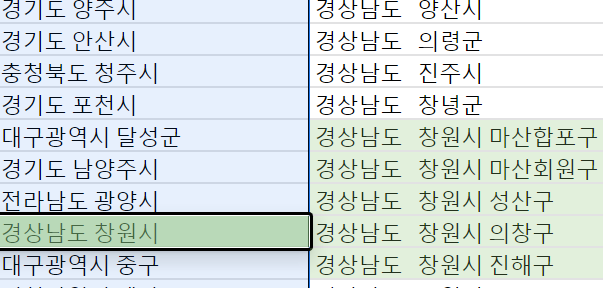

- 나이스 비즈인포의 주소에 sbiz 주소 유니크값이 속하면 매칭


- sbiz 군구 문자열 길이가 5이상인 시,도들에 대한 정제 필요확인

In [107]:
#pd.DataFrame(sbiz_sgg_ind1['행정구역'].unique())
temp1=df_sbiz[df_sbiz['군구'].str.len()>=5]
temp1

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,시도,군구,대분류,중분류,소분류,행정구역2,대분류2
7780,충청북도 청주시흥덕구,"전기, 가스, 증기 및 공기 조절 공급업(35) > 증기, 냉ㆍ온수 및 공기 조절 ...",793.43,0.00,0.00,0.00,100.00,0.0,충청북도,청주시흥덕구,"전기, 가스, 증기 및 공기 조절 공급업(35)","증기, 냉ㆍ온수 및 공기 조절 공급업","증기, 냉ㆍ온수 및 공기 조절 공급업",충청북도 청주시흥덕구,"전기, 가스, 증기 및 공기 조절 공급업"
7789,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39) > 하수, 폐수 및 분뇨 처...",793.43,0.00,0.01,-0.01,100.00,0.0,충청북도,청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","하수, 폐수 및 분뇨 처리업",폐수 처리업,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업"
7790,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39) > 하수, 폐수 및 분뇨 처...",793.43,0.00,0.01,-0.01,0.00,0.0,충청북도,청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","하수, 폐수 및 분뇨 처리업",사람 분뇨 처리업,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업"
7791,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39) > 폐기물 수집, 운반업 >...",793.43,0.00,0.01,-0.01,100.00,0.0,충청북도,청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업","지정 외 폐기물 수집, 운반업",충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업"
7792,충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39) > 폐기물 수집, 운반업 >...",793.43,0.00,0.01,-0.01,0.00,0.0,충청북도,청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)","폐기물 수집, 운반업","지정 폐기물 수집, 운반업",충청북도 청주시상당구,"수도, 하수 및 폐기물 처리, 원료 재생업"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65362,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96) > 그 외 기타 개인 서비...",859.60,0.00,0.02,-0.02,100.00,0.0,경기도,용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",그 외 기타 개인 서비스업,장례식장 및 장의관련 서비스업,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업"
65363,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96) > 그 외 기타 개인 서비...",859.60,0.01,0.02,-0.01,100.00,0.0,경기도,용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",그 외 기타 개인 서비스업,점술 및 유사 서비스업,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업"
65364,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96) > 그 외 기타 개인 서비...",859.60,0.00,0.02,-0.02,100.00,0.0,경기도,용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",그 외 기타 개인 서비스업,개인 간병 및 유사 서비스업,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업"
65365,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96) > 그 외 기타 개인 서비...",859.60,0.00,0.02,-0.02,25.00,0.0,경기도,용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",그 외 기타 개인 서비스업,애완 동물 장묘 및 보호 서비스업,경기도 용인시수지구,"협회 및 단체, 수리 및 기타 개인 서비스업"


- 청주시, 천안시, 전주시, 포항시, 창원시, 수원시, 성남시, 안양시, 부천시, 안산시, 고양시, 용인시만 정제 필요

In [108]:
temp1['군구'].unique()

array(['청주시흥덕구', '청주시상당구', '청주시서원구', '청주시청원구', '천안시동남구', '천안시서북구',
       '전주시완산구', '전주시덕진구', '포항시남구', '포항시북구', '창원시의창구', '창원시성산구',
       '창원시마산합포구', '창원시마산회원구', '창원시진해구', '수원시장안구', '수원시권선구', '수원시팔달구',
       '수원시영통구', '성남시수정구', '성남시중원구', '성남시분당구', '안양시만안구', '안양시동안구',
       '부천시원미구', '부천시소사구', '부천시오정구', '안산시상록구', '안산시단원구', '고양시덕양구',
       '고양시일산동구', '고양시일산서구', '용인시처인구', '용인시기흥구', '용인시수지구'], dtype=object)

In [30]:
# 위 12개의 군구 데이터를 활용해서 정제
address_prep=nice_biz[(nice_biz['군구']=='청주시')|(nice_biz['군구']== '천안시')|(nice_biz['군구']=='전주시')|( nice_biz['군구']=='포항시')|(nice_biz['군구']=='창원시')| 
            (nice_biz['군구']=='수원시')|(nice_biz['군구']=='성남시')|(nice_biz['군구']=='안양시')|(nice_biz['군구']=='부천시')|(nice_biz['군구']=='안산시')|
            (nice_biz['군구']=='고양시')|(nice_biz['군구']=='용인시')]

#gg['address2']=gg'시도']+" "+gg['군구']+gg['군구2']

In [31]:
address_prep['address2']=address_prep['시도']+" "+address_prep['군구']+address_prep['군구2']
address_prep.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,시도,군구,시도군구,면,면2,군구2,address2
20,1018122999,경기 성남시 중원구 둔촌대로 156-6,"(C14192)근무복, 작업복 및 유사의복 제조업",5.0,1.0,1.0,2.0,0.6316,0.4737,31.0,경기도,성남시,경기도 성남시,중원구,둔촌대로,중원구,경기도 성남시중원구
38,1018143015,"경기 안양시 동안구 벌말로 140, 7102-7107, 7402, 7403",(C27112)전기식 진단 및 요법 기기 제조업,6.0,1.0,1.0,5.0,0.1212,0.0909,25.0,경기도,안양시,경기도 안양시,동안구,벌말로,동안구,경기도 안양시동안구
40,1018144673,경기 고양시 일산서구 송산로 476,(G46521)가전제품 및 부품 도매업,4.0,1.0,1.0,2.0,0.0278,0.3889,24.0,경기도,고양시,경기도 고양시,일산서구,송산로,일산서구,경기도 고양시일산서구
65,1018157125,경기 안양시 동안구 시민대로 202,(M70121)전기ㆍ전자공학 연구개발업,4.0,2.0,1.0,1.0,0.1000,0.2000,22.0,경기도,안양시,경기도 안양시,동안구,시민대로,동안구,경기도 안양시동안구
79,1018167619,경기 안양시 동안구 시민대로 202,(J63991)데이터베이스 및 온라인정보 제공업,5.0,2.0,1.0,1.0,0.0000,0.0000,21.0,경기도,안양시,경기도 안양시,동안구,시민대로,동안구,경기도 안양시동안구


In [32]:
# 위 12개의 군구에 해당하지 않는 나머지 데이터들 분리

address_prep2=nice_biz[~(nice_biz['군구']=='청주시')&~(nice_biz['군구']== '천안시')&~(nice_biz['군구']=='전주시')&~( nice_biz['군구']=='포항시')&~(nice_biz['군구']=='창원시')& 
            ~(nice_biz['군구']=='수원시')&~(nice_biz['군구']=='성남시')&~(nice_biz['군구']=='안양시')&~(nice_biz['군구']=='부천시')&~(nice_biz['군구']=='안산시')&
            ~(nice_biz['군구']=='고양시')&~(nice_biz['군구']=='용인시')]
address_prep2['address2']=address_prep2['시도']+" "+address_prep2['군구']
address_prep2.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,시도,군구,시도군구,면,면2,군구2,address2
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시,종로구,서울특별시 종로구,삼일대로,428,삼일대로,서울특별시 종로구
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,NaN,0.000,0.00,53.0,서울특별시,종로구,서울특별시 종로구,청계천로,137,청계천로,서울특별시 종로구
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.800,0.60,55.0,서울특별시,종로구,서울특별시 종로구,율곡로,84,율곡로,서울특별시 종로구
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.125,0.25,NaN,서울특별시,종로구,서울특별시 종로구,종로12길,15,종로12길,서울특별시 종로구
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,NaN,0.000,0.00,NaN,서울특별시,종로구,서울특별시 종로구,종로,125,종로,서울특별시 종로구


- 정제 전 nice_biz개체 수 :  35709 / 12개 군구 지역 제외한 개체 수:  30100 / 12개 군구에 해당하는 개체수 :  5609

In [33]:
print('정제 전 nice_biz개체 수 : ',len(nice_biz),'|','12개 군구 지역 제외한 개체 수: ',len(address_prep2), '|','12개 군구에 해당하는 개체수 : ',len(address_prep))

정제 전 nice_biz개체 수 :  35709 | 12개 군구 지역 제외한 개체 수:  30100 | 12개 군구에 해당하는 개체수 :  5609


In [34]:
# address_prep + address_prep2 concat
nice_biz_2=pd.concat([address_prep,address_prep2],axis=0)
#불필요 칼럼 제거
nice_biz_2=nice_biz_2.drop(['시도','시도군구','군구','군구2','면','면2'],axis=1)
nice_biz_2.sort_index()

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,address2
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 종로구
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,NaN,0.0000,0.0000,53.0,서울특별시 종로구
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.8000,0.6000,55.0,서울특별시 종로구
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.1250,0.2500,NaN,서울특별시 종로구
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,NaN,0.0000,0.0000,NaN,서울특별시 종로구
...,...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,"경남 창원시 성산구 중앙대로 56, 3층 303-1호",(F41100)건물 건설업,4.0,1.0,1.0,NaN,0.0000,0.0000,6.0,경상남도 창원시성산구
35705,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 영등포구
35706,8998800150,부산 남구 전포대로 26,(M71531)경영 컨설팅업,4.0,1.0,1.0,5.0,0.7368,0.9474,11.0,부산광역시 남구
35707,8998800427,충남 천안시 서북구 입장면 성진로 1192-6,(C26299)그 외 기타 전자부품 제조업,5.0,1.0,1.0,3.0,0.0625,0.5750,6.0,충청남도 천안시서북구


In [35]:
#주소정제된 nice_biz_2. 저장
nice_biz_2.reset_index(inplace = True )
nice_biz_2.to_csv('nice_biz_address_prep_221106.csv',encoding='utf-8-sig')

## 액티브 및 휴폐업 기업 정보,  nice biz info, sbiz 결합
- 액티브_중소법인_기업외감_산업분류.xlsx, 휴폐업_중소법인_기업개요_산업분류.xlsx'

 ### 액티브 및 휴폐업 기업 정보에 사업자번호 기준 nice biz info merge

In [67]:
# 산업 추가된 액티브 및 휴폐업 기업 정보 파일 불러오기-> 35,555개로 줄어든 코드 붙여야할듯!
import pandas as pd
active_nonactive= pd.read_csv(r'C:\Users\Choi\workspace\sesac\0놋북2자료_1028\공모전\data\1차정제\팀원 공통자료\액티브_휴폐업_산업분류추가_excel기준.csv')
active_nonactive.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,ind_cate_01,ind_cate_02
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,100333.000000,1.554030e+07,25000.0,59170.00,도매 및 소매업,소매업; 자동차 제외
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,1.302667e+00,7.403667e+00,1.793567e+01,2.417833e+01,436104.666667,1.437246e+07,208.0,2308936.00,제조업,"가죽, 가방 및 신발 제조업"
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,2.109333e+00,1.000000e+12,1.446267e+01,7.373667e+01,333.333333,1.094263e+07,1357.0,NaN,운수 및 창고업,육상 운송 및 파이프라인 운송업
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,1.198250e+00,5.467900e+01,5.865000e+00,7.546250e+00,11666.750000,2.501015e+07,392240.5,621335.25,제조업,자동차 및 트레일러 제조업
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,5.000000e+11,5.000000e+11,5.000000e+11,5.000000e+11,23102.000000,1.064480e+06,NaN,813755.00,도매 및 소매업,도매 및 상품 중개업


In [68]:
active_nonactive=active_nonactive.drop(['ind_cate_01','ind_cate_02'],axis=1)
active_nonactive

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,4.291190e+02,6.340900e+01,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,100333.000000,1.554030e+07,25000.000000,5.917000e+04
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,9.514967e+01,5.749233e+01,1.302667e+00,7.403667e+00,1.793567e+01,2.417833e+01,436104.666667,1.437246e+07,208.000000,2.308936e+06
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,3.333333e+11,3.327900e+01,2.109333e+00,1.000000e+12,1.446267e+01,7.373667e+01,333.333333,1.094263e+07,1357.000000,NaN
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,3.114575e+01,4.321525e+01,1.198250e+00,5.467900e+01,5.865000e+00,7.546250e+00,11666.750000,2.501015e+07,392240.500000,6.213352e+05
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,1.848397e+03,7.732640e+02,5.000000e+11,5.000000e+11,5.000000e+11,5.000000e+11,23102.000000,1.064480e+06,NaN,8.137550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35550,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,3.333333e+11,5.215967e+01,3.333333e+11,3.333333e+11,2.698233e+01,2.537800e+01,3358.333333,1.115643e+06,207652.666667,5.416303e+05
35551,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,3.333333e+11,1.169547e+02,3.333333e+11,3.333333e+11,1.084700e+01,1.985533e+01,NaN,3.513378e+06,103485.000000,8.376033e+05
35552,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,1.000000e+12,6.136260e+02,5.000000e+11,5.000000e+11,1.808000e+01,1.000000e+12,9404.000000,1.376250e+05,NaN,1.759450e+04
35553,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,0.000000,0.000000e+00,198639.000000,4.066900e+04


In [69]:
len(active_nonactive)

35555

1. 넘블 데이터 산업코드 IND_CD1 기준, 통계청 산업분류(소분류항목명) 결합


In [70]:
# 엑셀로 항목명 채운 통계청 산업분류 코드 파일가져오기
import pandas as pd
indcd= pd.read_excel(r'C:\Users\Choi\workspace\sesac\0놋북2자료_1028\공모전\data\1차정제\한국표준산업분류(10차)_표_NAN값채움.xlsx')
indcd
#세세분류코드 타입변경, 5자리 형태로 만들기
indcd=indcd.astype({'세세분류코드':'str'})
indcd['세세분류코드']=indcd['세세분류코드'].str.split('.').str[0]


In [71]:
#IND_CD1 칼럼 타입 변경
active_nonactive=active_nonactive.astype({'IND_CD1':'str'})
active_nonactive['IND_CD1']=active_nonactive['IND_CD1'].str.split('.').str[0]
active_nonactive['IND_CD1'].head()


0    47712
1    15190
2    49212
3    30391
4    46800
Name: IND_CD1, dtype: object

In [72]:
#4자릿수인 코드명 앞에 0삽입 numble_df_
for i in range(len(active_nonactive['IND_CD1'])):
    if len(active_nonactive['IND_CD1'][i])==4:
        active_nonactive['IND_CD1'][i]='0'+active_nonactive['IND_CD1'][i]
        

active_nonactive['IND_CD1']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0        47712
1        15190
2        49212
3        30391
4        46800
         ...  
35550    10200
35551    10122
35552    56111
35553    58222
35554    29280
Name: IND_CD1, Length: 35555, dtype: object

In [73]:
#4자릿수인 코드명 앞에 0삽입  numble_df_
for i in range(len(indcd['세세분류코드'])):
    if len(indcd['세세분류코드'][i])==4:
        indcd['세세분류코드'][i]='0'+indcd['세세분류코드'][i]

indcd['세세분류코드']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       01110
1       01121
2       01122
3       01123
4       01131
        ...  
1192    97000
1193    98100
1194    98200
1195    99001
1196    99009
Name: 세세분류코드, Length: 1197, dtype: object

In [74]:
indcd_cate=pd.concat([indcd['세세분류코드'],indcd['대분류항목명'],indcd['중분류항목명']],axis=1)
indcd_01=[]
for string in indcd_cate['대분류항목명']:
    #print(string)
    sss=string.split('(')
    indcd_01.append(sss[0])
    
print(len(indcd_01))

pd.DataFrame(indcd_01,columns=['대분류항목명'])
new_indcd_cate=pd.concat([indcd['세세분류코드'],pd.DataFrame(indcd_01,columns=['대분류항목명']),indcd['중분류항목명']],axis=1)
new_indcd_cate

1197


,세세분류코드,대분류항목명,중분류항목명
0,01110,"농업, 임업 및 어업",농업
1,01121,"농업, 임업 및 어업",농업
2,01122,"농업, 임업 및 어업",농업
3,01123,"농업, 임업 및 어업",농업
4,01131,"농업, 임업 및 어업",농업
...,...,...,...
1192,97000,가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동,가구 내 고용활동
1193,98100,가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동,달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동
1194,98200,가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동,달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동
1195,99001,국제 및 외국기관,국제 및 외국기관


In [77]:
ind_merge_temp=pd.merge(active_nonactive,new_indcd_cate,left_on='IND_CD1',right_on='세세분류코드',how='left')
len(ind_merge_temp)

35555

In [78]:
ind_merge_temp

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,세세분류코드,대분류항목명,중분류항목명
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,1.000000e+12,1.000000e+12,1.000000e+12,100333.000000,1.554030e+07,25000.000000,5.917000e+04,47712,도매 및 소매업,소매업; 자동차 제외
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,7.403667e+00,1.793567e+01,2.417833e+01,436104.666667,1.437246e+07,208.000000,2.308936e+06,15190,제조업,"가죽, 가방 및 신발 제조업"
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,1.000000e+12,1.446267e+01,7.373667e+01,333.333333,1.094263e+07,1357.000000,NaN,49212,운수 및 창고업,육상 운송 및 파이프라인 운송업
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,5.467900e+01,5.865000e+00,7.546250e+00,11666.750000,2.501015e+07,392240.500000,6.213352e+05,30391,제조업,자동차 및 트레일러 제조업
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,5.000000e+11,5.000000e+11,5.000000e+11,23102.000000,1.064480e+06,NaN,8.137550e+05,46800,도매 및 소매업,도매 및 상품 중개업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35550,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,3.333333e+11,2.698233e+01,2.537800e+01,3358.333333,1.115643e+06,207652.666667,5.416303e+05,NaN,NaN,NaN
35551,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,3.333333e+11,1.084700e+01,1.985533e+01,NaN,3.513378e+06,103485.000000,8.376033e+05,10122,제조업,식료품 제조업
35552,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,5.000000e+11,1.808000e+01,1.000000e+12,9404.000000,1.376250e+05,NaN,1.759450e+04,56111,숙박 및 음식점업,음식점 및 주점업
35553,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,1.000000e+12,1.000000e+12,1.000000e+12,0.000000,0.000000e+00,198639.000000,4.066900e+04,58222,정보통신업,출판업


- 사업자번호기준 결합

In [79]:
merge_temp=pd.merge(ind_merge_temp,nice_biz_2,left_on='BIZ_NO',right_on='사업자번호',how='left')
len(merge_temp)

35555

In [82]:
merge_temp.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,address2
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,서울 구로구 경인로 537,(G47712)운송장비용 가스 충전업,5.0,1.0,1.0,3.0,0.0455,0.2273,NaN,서울특별시 구로구
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,서울 광진구 광나루로 450,(C30391)자동차용 신품 조향장치 및 현가 장치 제조업,4.0,1.0,1.0,2.0,0.6667,0.0000,31.0,서울특별시 광진구
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,"인천 연수구 먼우금로 19, 212호",(H49212)시내버스 운송업,4.0,2.0,1.0,5.0,0.1261,0.2703,NaN,인천광역시 연수구
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,경북 경산시 진량읍 일연로 653-28,(C30399)그 외 자동차용 신품 부품 제조업,4.0,1.0,1.0,4.0,0.3500,0.3500,23.0,경상북도 경산시
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,"서울 중구 소공로 35, 315호 314호, 315호",운동 및 경기용품 도매업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 중구


### [액티브 및 휴폐업 기업 정보+ nice biz info ] 와 행정구역 및 대분류 기준 sbiz merge

- [엑티브 + nice biz info ]+sbiz 주소, 대분류업종 기준 결합
- sbiz_sgg_ind1 : sbiz_sgg_ind1=df_sbiz.groupby(['행정구역2','대분류2']).mean()

In [49]:
sbiz_sgg_ind1.head()

,행정구역,대분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,강원도 강릉시,건설업,211.74,0.085000,0.044688,0.040625,70.210625,0.562500
1,강원도 강릉시,교육 서비스업,211.74,0.267778,0.061111,0.207778,96.681111,0.555556
2,강원도 강릉시,금융 및 보험업,211.74,0.016000,0.026000,-0.004000,95.000000,0.200000
3,강원도 강릉시,도매 및 소매업,211.74,0.138671,0.063846,0.075455,78.910490,0.545455
4,강원도 강릉시,보건업 및 사회복지 서비스업,211.74,0.107143,0.111429,-0.001429,47.412857,0.714286


- 칼럼명 일치시키기

In [83]:
sbiz_sgg_ind1_2=sbiz_sgg_ind1.rename(columns={'행정구역':'address2'})
sbiz_sgg_ind1_2=sbiz_sgg_ind1_2.rename(columns={'대분류':'대분류항목명'})
sbiz_sgg_ind1_2.head()

,address2,대분류항목명,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,강원도 강릉시,건설업,211.74,0.085000,0.044688,0.040625,70.210625,0.562500
1,강원도 강릉시,교육 서비스업,211.74,0.267778,0.061111,0.207778,96.681111,0.555556
2,강원도 강릉시,금융 및 보험업,211.74,0.016000,0.026000,-0.004000,95.000000,0.200000
3,강원도 강릉시,도매 및 소매업,211.74,0.138671,0.063846,0.075455,78.910490,0.545455
4,강원도 강릉시,보건업 및 사회복지 서비스업,211.74,0.107143,0.111429,-0.001429,47.412857,0.714286


In [84]:
pd.DataFrame(sbiz_sgg_ind1_2['대분류항목명'].value_counts())

,대분류항목명
숙박 및 음식점업,252
보건업 및 사회복지 서비스업,251
건설업,247
"수도, 하수 및 폐기물 처리, 원료 재생업",244
부동산업,242
교육 서비스업,236
제조업,236
"협회 및 단체, 수리 및 기타 개인 서비스업",234
"예술, 스포츠 및 여가관련 서비스업",228
도매 및 소매업,225


- [액티브 및 휴폐업 기업 정보 + nice biz info ]+sbiz 주소, 대분류업종 기준 결합

In [85]:
act_nonact_nice_sbiz=pd.merge(merge_temp,sbiz_sgg_ind1_2,on=['address2','대분류항목명'],how='left')
act_nonact_nice_sbiz.head()
#act_nonact_nice_sbiz.to_csv('액티브 및 휴폐업 기업 정보_nice_sbiz_221121.csv',index=False)

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,employment,resignation,cmp_years,address2,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,0.0455,0.2273,NaN,서울특별시 구로구,426.34,0.153176,0.030706,0.122824,76.385059,0.529412
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,0.6667,0.0000,31.0,서울특별시 광진구,323.84,0.054545,0.028571,0.025065,64.025325,0.506494
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,0.1261,0.2703,NaN,인천광역시 연수구,286.74,0.329091,0.055455,0.277273,70.590909,0.272727
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,0.3500,0.3500,23.0,경상북도 경산시,313.36,0.038343,0.028177,0.009171,52.516575,0.414365
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,NaN,NaN,NaN,서울특별시 중구,442.23,0.588721,0.030698,0.558372,72.280930,0.720930


In [89]:
len(act_nonact_nice_sbiz)
act_nonact_nice_sbiz.to_excel('액티브 및 휴폐업 기업 정보_nice_sbiz_221121.xlsx',index=False)

In [87]:
act_nonact_nice_sbiz['주간인구수'].isnull().sum()

10461

In [110]:
merge_temp.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,address2
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,서울 구로구 경인로 537,(G47712)운송장비용 가스 충전업,5.0,1.0,1.0,3.0,0.0455,0.2273,NaN,서울특별시 구로구
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,서울 광진구 광나루로 450,(C30391)자동차용 신품 조향장치 및 현가 장치 제조업,4.0,1.0,1.0,2.0,0.6667,0.0000,31.0,서울특별시 광진구
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,"인천 연수구 먼우금로 19, 212호",(H49212)시내버스 운송업,4.0,2.0,1.0,5.0,0.1261,0.2703,NaN,인천광역시 연수구
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,경북 경산시 진량읍 일연로 653-28,(C30399)그 외 자동차용 신품 부품 제조업,4.0,1.0,1.0,4.0,0.3500,0.3500,23.0,경상북도 경산시
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,"서울 중구 소공로 35, 315호 314호, 315호",운동 및 경기용품 도매업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 중구


In [119]:
act_nonact_nice_sbiz.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,employment,resignation,cmp_years,address2,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,0.0455,0.2273,NaN,서울특별시 구로구,426.34,0.153176,0.030706,0.122824,76.385059,0.529412
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,0.6667,0.0000,31.0,서울특별시 광진구,323.84,0.054545,0.028571,0.025065,64.025325,0.506494
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,0.1261,0.2703,NaN,인천광역시 연수구,286.74,0.329091,0.055455,0.277273,70.590909,0.272727
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,0.3500,0.3500,23.0,경상북도 경산시,313.36,0.038343,0.028177,0.009171,52.516575,0.414365
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,NaN,NaN,NaN,서울특별시 중구,442.23,0.588721,0.030698,0.558372,72.280930,0.720930


In [122]:
act_nonact_nice_sbiz.shape

(35555, 95)

In [126]:
act_nonact_nice_sbiz_2=act_nonact_nice_sbiz.iloc[:,[0,88,89,90,91,92,93,94]]
act_nonact_nice_sbiz_2=act_nonact_nice_sbiz_2.rename(columns={'BIZ_NO':'사업자번호'})
act_nonact_nice_sbiz_2

,사업자번호,address2,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,1138111739,서울특별시 구로구,426.34,0.153176,0.030706,0.122824,76.385059,0.529412
1,2078132193,서울특별시 광진구,323.84,0.054545,0.028571,0.025065,64.025325,0.506494
2,1318167565,인천광역시 연수구,286.74,0.329091,0.055455,0.277273,70.590909,0.272727
3,5048128251,경상북도 경산시,313.36,0.038343,0.028177,0.009171,52.516575,0.414365
4,1098164260,서울특별시 중구,442.23,0.588721,0.030698,0.558372,72.280930,0.720930
...,...,...,...,...,...,...,...,...
35550,4808501629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35551,8018501578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35552,4118523419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35553,1738102533,경기도 부천시석천로,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
act_nonact_nice_sbiz_2['주간인구수'].isnull().sum()

10461

In [128]:
act_nonact_nice_sbiz_2.to_csv('bizno_sbiz_ind01_mean.csv',encoding='utf-8-sig')